# Documentation

# Question 1 

I chose Simmulated Annealing as a stochastic optimiser for Task 3 

# Question 2 Why did you choose this optimiser?

The spring relies on multiple variables making the graphical image of what the data might look like very complex, this means 
we cannot just choose a simple algorithm to optimise the problem and a stochastic approach would be beneficial.
Simulated annealing allows distortion to be added to the data set to avoid getting stuck at a local minima,
this normally allows a good optimal to be found. Simulated annealing works better with continuous function approximation 
than GA algorithms. As f(x) is a continuous function this makes simulated annealing the better option that should be implemented
to solve this problem. [99 words]

# Question 3 What constraint handling method(s) are you using and why?

To handle the inequality constraints of g1 to g4 which keep all the simulated annealing points within the feasible space I
have used death penalties. Any combinations of values (x1, x2, x3) that do not pass g1 to g4 inequalities are rejected as these would produce an f(x) outside of the feasible region and take up more computational power than necessary. Death penalties are implemented in my is_feasible(array) method that takes in an array of the 3 x values and returns true if they satisfy all the  functions, and false otherwise. is_feasible is used to generate the random arrays and in the simulated annealing distort() method. I have chosen death penalties because the feasible space is fairly large. I have not used static or adaptive penalties because I wanted to put more emphasis on user defined parameters. [140 words]


In [18]:
import numpy as np
import math
import random
import matplotlib as mpl
import matplotlib.pyplot as plt 
import datetime

#make the random number predicatable 
np.random.seed(250599)

In [2]:
wire_lower = 0.05 #lower bound for diameter of the wire
wire_upper = 2 #upper bound for diameter of the wire

coil_lower = 0.25 #lower bound for diameter of coil
coil_upper = 1.3 #upper bound for diameter of the coil

coil_num_lower = 2 #lower bound for number of active coils
coil_num_upper = 15 #upper bound for number of active coils

In [3]:
arr_X = np.array([1, 2, 3])

# Task 1 implementation of f(x)
Question 1

: the diameter of the wire (x0), 
the mean of the diameter of coil(x1)
and the number of active coils (x2)

In [4]:
def f(x, fCount=[0]):
    fun = float(x[0] ** 2)*x[1]*(2 + x[2])
#     print(fun)
    fCount[0]+=1
    return [fun, fCount[0]]

def g1(x, g1Count=[0]):
    g1Count[0]+=1
    fun = float(1 - (((x[1]**3)*x[2])/(71785*(x[0]**4))))
    return [fun <= 0, g1Count[0]]
    
def g2(x, g2Count=[0]):
    fun = (   (((4*x[1]**2) - (x[0]*x[1]))/(12566*((x[1]*(x[0]**3))-(x[0]**4)))) + (1/(5108*(x[0]**2)))  - 1 )
    g2Count[0]+=1
    return[fun <= 0, g2Count[0]]

    
def g3(x, g3Count=[0]):
    fun = (1 - (140.45*x[0])/((x[1]**2)*x[2]))
    g3Count[0]+=1
    return[fun <= 0, g3Count[0]]

    
def g4(x, g4Count=[0]):
    fun = (  ((x[0] + x[1])/1.5)-1  )
    g4Count[0]+=1
    return[fun <= 0, g4Count[0]]

    

In [5]:
print(f(arr_X))
print(f(arr_X))
print(f(arr_X))

print (g1(arr_X))
print (g1(arr_X))
print (g1(arr_X))

print (g2(arr_X))
print (g2(arr_X))
print (g2(arr_X))

print (g3(arr_X))
print (g3(arr_X))
print (g3(arr_X))

print (g4(arr_X))
print (g4(arr_X))
print (g4(arr_X))  



[10.0, 1]
[10.0, 2]
[10.0, 3]
[False, 1]
[False, 2]
[False, 3]
[True, 1]
[True, 2]
[True, 3]
[True, 1]
[True, 2]
[True, 3]
[False, 1]
[False, 2]
[False, 3]


# Task 2 - Random Search

In [6]:
def generate_random_array():
    #generate random number 
    x0 = np.random.uniform(low=wire_lower, high=wire_upper) #random number produces highest + 1 but cannot effectively fix this
    x1 = np.random.uniform(low=coil_lower, high=coil_upper) #hightest + 1
    x2 = np.random.uniform(low=coil_num_lower, high=coil_num_upper) #hightest + 1
    
    return np.array([x0, x1, x2])
    

In [7]:
def is_feasible(array):
    feasible = False
    g1_arr=g1(array)
    g2_arr=g2(array)
    g3_arr=g3(array)
    g4_arr=g4(array)

#     print(g1_arr)
#     print(g2_arr)
#     print(g3_arr)
#     print(g4_arr)

    if g1_arr[0] and g2_arr[0] and g3_arr[0] and g4_arr[0] :
        feasible = True
    else:
        feasible = False
    return feasible
    

In [8]:
def generate_feasible_random_array():
    feasible = False
    while not feasible:
        array = generate_random_array()
        feasible = is_feasible(array)
    return array

In [9]:
def random_search(iteration=3000):
    
    best_fx = [1000,0]
    
    for x in range(best_fx[1], (best_fx[1]+iteration)):
        arr_x = generate_feasible_random_array()
        
        fx = f(arr_x)
        if fx[0] < best_fx[0]:
            best_x = np.array([arr_x[0], arr_x[1], arr_x[2]])
            best_fx = fx

    return [best_x, best_fx]

In [10]:
random_search()

[array([ 0.05441059,  0.41074838, 10.13451858]), [0.014755883860384417, 749]]

# Task 3 - Simulated Annealing

In [11]:
def distort(array):
    x0 = array[0]
    x1 = array[1]
    x2 = array[2]
    
    x0_new = 1000 #not feasible to begin with
    x1_new = 1000 #not feasible to begin with
    x2_new = 1000 #not feasible to begin with
    
    while not is_feasible(np.array([x0_new, x1, x2])):
        x0_new = np.random.normal(x0, 1)
        x0_clipped = np.clip(x0_new, wire_lower, wire_upper)

    while not is_feasible(np.array([x0_new, x1_new, x2])):
        x1_new = np.random.normal(x1,1)
        x1_clipped = np.clip(x1_new, coil_lower, coil_upper)
        
    while not is_feasible(np.array([x0_new, x1_new, x2_new])):
        x2_new = np.random.normal(x2,1)
        x2_clipped = np.clip(x2_new, coil_num_lower, coil_num_upper)
   
    # print(str(x0_new) + " " + str(x1_new) + " " + str(x2_new))
    return [x0_new, x1_new, x2_new]

In [12]:
#test of distort method
start_values_array = generate_feasible_random_array()
print(start_values_array)
distorte = (distort(start_values_array))

[ 0.07109789  0.74359465 12.92729025]


In [24]:
def simulated_annealing(gamma, iteration = 3000):
    
    start_values_array = generate_feasible_random_array()
    best_fx = f(start_values_array)
    current_fx = best_fx
    
#     print("lets start at random " + str(start_values_array))
#     print("best fx so far " + str(best_fx))
    
    start_fx_count = best_fx[1]
    
    for t in range(start_fx_count, (start_fx_count+iteration)):

        itr_num = t-start_fx_count
        
        new_neighbours = distort(start_values_array)
        new_neighbours = generate_feasible_random_array()
        new_fx = f(new_neighbours)
        
#         print("neighbour array: " + str(new_neighbours))
#         print("neighbour fx value: " + str(new_fx))

        delta_fx = new_fx[0] - current_fx[0]
        
        temperature=(gamma*itr_num)

#         print("Iteration " + str(itr_num) + ": the neighbours used were " + str(new_neighbours) )
#         print(" the probability is " + str(min(math.exp(-1*(delta_fx/temperature)),1) ) + " fx is " + str(delta_fx) )
#         print(" parameters were delta = "+ str(delta_fx) + " new_fx " + str(new_fx[0]) + " current_fx " + str(current_fx[0]) + "temp" +str(temperature))
        
        if (min(math.exp(-1*(delta_fx/temperature)),1) > random.random()):
#             print("CURRENT CHANGED")
#             print("----------------------------------------------------------------------------------------------")
            
            if delta_fx < 0:
                best_fx = new_fx #new minimum
#                 print("Success : found a smaller fx")
            
            current_fx = new_fx
            
        
    return best_fx

In [ ]:
gamma = 0.25
simulated_annealing(gamma)
print("finished")

# Task 4 - Repetitions

In [20]:
#task 4 random search

lowest_fx = [1000, 0]
highest_fx = [0, 0]

best_fx_array = np.array([])
best_x_values = np.array([])

for x in range(0, 21):

    best_solution = random_search()
        
    best_fx_array = np.append(best_fx_array, best_solution[1])   
    best_x_values = np.append(best_x_values, best_solution[0])                 
    
    print(str(datetime.datetime.now().strftime('%H:%M:%S')) + " Iteration: " + str(x) + ", fx solution gave " + str(best_solution[1][0]) + ", with x values " + str(best_solution[0]) + ".")
    
    this_fx = (best_solution[1])[0]
    
    if (float(this_fx) > highest_fx[0]):
        highest_fx = best_solution[1]
        print("Highest fx found")
    
    if (float(this_fx) < lowest_fx[0]):
        lowest_fx = best_solution[1]
        print("Lowest fx found")
        
    
    print("The current lowest is " + str(lowest_fx) + ". The current highest is " + str(highest_fx) +"\n")
    
print("Lowest FX Solution: " + str(lowest_fx))
    

12:31:51 Iteration: 0, fx solution gave 0.013582370280303626, with x values [0.05406833 0.40855802 9.37197497].
Highest fx found
Lowest fx found
The current lowest is [0.013582370280303626, 130450]. The current highest is [0.013582370280303626, 130450]

12:32:01 Iteration: 1, fx solution gave 0.013304764933835747, with x values [ 0.05159969  0.35426818 12.10525389].
Lowest fx found
The current lowest is [0.013304764933835747, 135136]. The current highest is [0.013582370280303626, 130450]

12:32:11 Iteration: 2, fx solution gave 0.012843101024885843, with x values [ 0.05131111  0.34757311 12.03462576].
Lowest fx found
The current lowest is [0.012843101024885843, 138017]. The current highest is [0.013582370280303626, 130450]

12:32:22 Iteration: 3, fx solution gave 0.01348384640523081, with x values [ 0.05281507  0.37034113 11.05257478].
The current lowest is [0.012843101024885843, 138017]. The current highest is [0.013582370280303626, 130450]

12:32:32 Iteration: 4, fx solution gave 0.0

In [26]:
#task 4 simulated annealing

lowest_fx_sa = 1000
highest_fx_sa = 0

best_fx_array_sa = np.array([])

gamma = 0.2

for x in range(0, 21):
    best_fx_sa = simulated_annealing(gamma)
    
    best_fx_array_sa = np.append(best_fx_array_sa, best_fx_sa)             
    
    if (float(best_fx_sa[0]) > highest_fx_sa):
        highest_fx_sa = best_fx_sa[0]
    
    if (float(best_fx_sa[0]) < lowest_fx_sa):
        lowest_fx_sa = best_fx_sa[0]
        
    print(str(datetime.datetime.now().strftime('%H:%M:%S')) + " Iteration: " + str(x) + ", fx solution gave " + str(best_fx_sa[0]) + ".")

print(best_fx_array_sa)
print(best_fx_sa)
    
print(lowest_fx_sa)
print(highest_fx_sa)

<ipython-input-24-4916ebf43362>:31: RuntimeWarning: divide by zero encountered in double_scalars
  if (min(math.exp(-1*(delta_fx/temperature)),1) > random.random()):


12:38:41 Iteration: 0, fx solution gave 0.02358106507508668.
12:38:59 Iteration: 1, fx solution gave 0.06204383998545164.
12:39:22 Iteration: 2, fx solution gave 0.0497269173658511.
12:39:48 Iteration: 3, fx solution gave 0.03895739334644673.
12:40:11 Iteration: 4, fx solution gave 0.042992739293681824.
12:40:38 Iteration: 5, fx solution gave 0.031979542238724824.
12:41:02 Iteration: 6, fx solution gave 0.06810705769278755.
12:41:22 Iteration: 7, fx solution gave 0.023382642619307274.
12:41:43 Iteration: 8, fx solution gave 0.06402826419712597.
12:42:06 Iteration: 9, fx solution gave 0.029523927204205866.
12:42:25 Iteration: 10, fx solution gave 0.0385691839128337.
12:42:44 Iteration: 11, fx solution gave 0.05245706067529298.
12:43:05 Iteration: 12, fx solution gave 0.03866633700702976.
12:43:26 Iteration: 13, fx solution gave 0.022884454031486874.
12:43:46 Iteration: 14, fx solution gave 0.027606631650765302.
12:44:15 Iteration: 15, fx solution gave 0.02669639748603357.
12:44:37 Itera

<IPython.core.display.Javascript object>


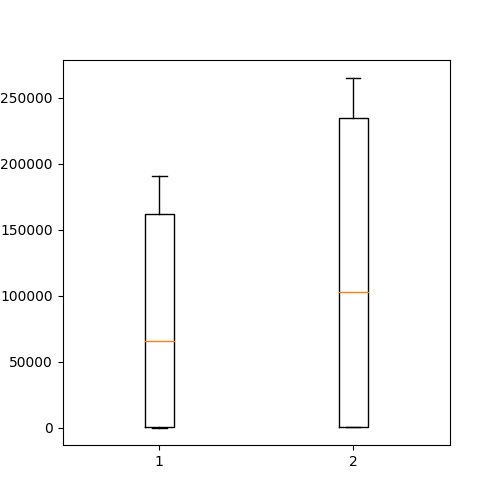

In [27]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import tkinter

# Fixing random state for reproducibility

random_data = best_fx_array
sa_data = best_fx_array_sa
data = [random_data, sa_data]

fig = plt.figure(figsize =(5, 5)) 

# Creating axes instance 
ax = fig.add_subplot() #axis
  
# Creating plot 
bp = ax.boxplot(data) 
  
# show plot 
plt.show() 



# Performances

While Simmulated annealing and random search both produce a similar lowest value, simmulated annealing produces worse results overall as the box is larger, this means that the upper and lower quartiles have a larger proportion of the results meaning a more varied spread of f(x) values.  Moreover, simulated annealing also returns a larger range (shown by the overall length of the graph) meaning there is more fluctuation in the results of each of the iterations and therefore less accuracy overall. Simulated annealing has a higher median meaning that it produces a higher f(x) weight value more frequently than random search, this is bad because we are trying to minimising the weight of the spring. The random search also performs quicker, with an average iteration speed of 10 seconds to process 3000 iterations of f(x), while simulated annealing takes at least double the time for equivalent f(x) iterations. I conclude that while both provide an optimised result, the random search is a better optimiser in this scenario.